![title](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fdyclassroom.files.wordpress.com%2F2019%2F09%2Fmongodb.jpg&f=1&nofb=1)

<div style="padding: 5px; height: 50px;"><h1 ><b style="color: #168b33" id="Uebersicht">Unstrukturierte Daten aus einer MongoDB auslesen und auswerten</b></h1></div>


1. [Übersicht](#Uebersicht)
    1. [Einführung in die dokumentenorientierte MongoDB](#Einführung)
    2. [Ziel dieses Notebooks](#Ziel)
    3. [Nicht behandelte Inhalte](#nicht-behandelt)
2. [MongoDB Grundlagen](#Grundlagen)
    1. [JSON und BSON](#BSON)
    2. [Relationships with Documents](#Relationships)
    3. [Aufgabenbereich zu den Grundlagen](#Aufgabenbereich-Grundlagen)
3. [Starten der MongoDB und Verbindung herstellen](#Start)
    1. [Lesen, speichern, updaten und löschen von Daten](#CRUD)
    2. [Aufgabenbereich zu den CRUD Methoden](#Aufgabenbereich-CRUD)
3. [Betrachten des Datenbestandes](#Datenbestand)
    1. [Importieren eines JSON Datensatzes](#JSON-Einlesen)
    2. [Datensatz mit Pandas anzeigen](#Pandas)
    3. [Die Dokumente direkt auslesen und mit Pandas anzeigen](#Direkt)
    4. [Aufgabenbereich zum Datenbestand](#Aufgabenbereich-Datenbestand)
5. [Erstellen von Queries mit den MongoDB Operatoren](#Queries)
    1. [Übersicht über die Operatoren](#Operatoren-Uebersicht)
    2. [Beispiele für die Operatoren](#beispiele-operatoren)
    3. [Aufgabenbereich für die MongoDB Operatoren](#Aufgabenbereich-Operatoren)
6. [Auslesen und Analysen durchführen mit der Aggregation Pipeline](#Pipeline)
    1. [Unterschied zwischen Operatoren und Stages](#Pipeline-Stages-Operatoren)
    2. [Implementieren einer Pipeline (Syntax)](#Pipeline-Syntax)
    3. [Beispiele mit der Aggregation Pipeline](#Pipeline-Beispiele) 
    4. [Aufgabenbereich zur Aggregation Pipeline](#Aufgabenbereich-Pipeline)
7. [Auslesen und Analysen durchführen mit dem Map-Reduce Verfahren](#Map)
    1. [Vorgehen bei dem Map Reduce-Verfahren](#Vorgehen)
    2. [Aufgabenbereich zum Map-Reduce Verfahren](#Aufgabenbereich-Map-Reduce)
8. [Speichern von großen Daten mit GridFS](#GridFS)
    1. [Ein Beispiel für GridFS mit einer Textdatei](#grid-text)
    2. [Ein Beispiel für GridFS mit einer Bilddatei](#grid-bild)
    3. [Aufgabenbereich zu GridFS](#Aufgabenbereich-GridFS)
9. [Abschlussaufgabe](#Abschlussaufgabe)
10. [Abschluss und Schlussfolgerungen aus dem Lernmodul](#Schluss)

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="Uebersicht">1. Übersicht</b></h2></div>

<b>MongoDB Treiber importieren</b>

Hier werden alle notwendigen Module für die Interaktion mit der MongoDB und den Daten geladen.

In [21]:
import pymongo
import datetime
import json 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
import gridfs
import base64
from bson.code import Code
from bson.son import SON
from bson.objectid import ObjectId
from pprint import pprint

<table style="font-size:14px">
	<tbody >
        <tr>
            <td style="font-size:18px;width: 280px;text-align: center;background-color: #057E7E;color:#ffffff" align="center"><b>Modul</b></td>
            <td style="font-size:18px;width: 280px;text-align: center;background-color: #057E7E;color:#ffffff" align="center"><b>Verwendung</b></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">pymongo</td>
			<td style="width: 200px;text-align: center;" align="center">MongoDB Python Treiber</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">datetime</td>
			<td style="width: 200px;text-align: center;" align="center">Ein neues Datum erstellen</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">json</td>
			<td style="width: 200px;text-align: center;" align="center">JSON encoder and decoder</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">matplotlib</td>
			<td style="width: 200px;text-align: center;" align="center">Visualization with Python</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">gridfs</td>
			<td style="width: 200px;text-align: center;" align="center">Speichern von großen Daten in MongoDB (Videos, Bilder, Audio)</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">bson.code</td>
			<td style="width: 200px;text-align: center;" align="center">Map-Reduce Codes implementieren</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">pandas</td>
			<td style="width: 200px;text-align: center;" align="center">Daten-Manipulation und -Analyse</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">numpy</td>
			<td style="width: 200px;text-align: center;" align="center">Mathematische Funktionen</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">SON (Serialized Ocument Notation)</td>
			<td style="width: 200px;text-align: center;" align="center">Interaktion mit den BSON Documenten</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">pprint</td>
			<td style="width: 200px;text-align: center;" align="center">Data pretty printer</td>
		</tr>
	</tbody>
</table>

<div style="border-bottom: 3px solid green;"><h3 ><b id="Einführung">1.1 Einführung in die dokumentenorientierte MongoDB</b></h3></div>

Große Datenmengen werden heutzutage schnell generiert. Die MongoDB ist eine dokumentenorientierte Datenbank, die oft dazu verwendet wird um strukturlose Daten in einem verteilten Cluster aus Datenbanken abzuspeichern. Einige Eigenschaften der MongoDB stechen besonders hervor, wenn es um die Wahl des geeigneten Database Management Systems
geht. Hierzu zählen eine richtige Abfragesprache für dynamische Abfragen, eine hohe Verfügbarkeit, Skalierbarkeit, eine effiziente Speicher Engine, Datenkonsistenz und Datenintegrität.

Die ersten Ideen für die MongoDB wurden im Februar 2007 umgesetzt. Die erste Version wurde aber im Jahre 2009 freigegeben. Die drei Erfinder und Gründer der MongoDB Inc. [Kevin P. Ryan](https://www.linkedin.com/in/kevinryan3), [Eliot Horowitz](https://www.linkedin.com/in/eliothorowitz?trk=public_profile_browsemap_profile-result-card_result-card_full-click) und [Dwight Merriman](https://www.linkedin.com/in/dmerr?trk=public_profile_browsemap_profile-result-card_result-card_full-click) haben das Projekt ins Leben gerufen. Seitdem hat die MongoDB sehr schnell viele Erfolge erzielen können. 

Anhand einer [Stackoverflow Umfrage](https://insights.stackoverflow.com/survey/2020#technology-databases) vom February 2020 ist zu sehen, das die Datenbank sowohl bei Entwicklern als auch bei Firmen sehr beliebt ist. Aktuell ist sie unter den Top 5 der beliebtesten Datenbank Systemen. Kentnisse mit dieser Datenbank sind somit oft gefragt.


MongoDB eignet sich am besten für große Datenmengen, wenn die vorhandenen Daten weitere Manipulationen für die gewünschte Ausgabe benötigen. Zu den leistungsstarken Funktion zählen hierbei die CRUD-Operationen, das Aggregations-Framework, die Textsuche und die Map-Reduce-Funktion.

<div style="border-bottom: 3px solid green;"><h3 ><b id="Ziel">1.2 Ziel dieses Notebooks</b></h3></div>

Es soll verdeutlicht werden wie aus einer NoSQL Datenbank Daten effizient ausgelesen werden können, um diese zu bearbeiten. Datensätze liegen nicht immer als CSV Datei vor oder liegen in einem verteilten System aus Datenbanken. Diese Daten direkt aus der Datenbank auszulesen und mit effektiven Werkzeugen wie dem Aggregations-Framework zu strukturieren ist das Ziel dieses Notebooks.

<div style="border-bottom: 3px solid green;"><h3 ><b id="nicht-behandelt">1.3 Inhalte die dieses Notebook nicht behandelt</b></h3></div>

Eine der wichtigsten Stärken der MongoDB ist die Replikation und Verteilung der Daten. Im Idealfall wird ein Cluster aus mehreren Datenbanken erstellt und auf verteileten Servern in Betrieb genommen.

<b>Setup für die Aufgabenüberprüfung</b>

In [164]:
from taskreview.learning_module import LearningModule
mongo_lm = LearningModule('mongoData/MongoTask.db')

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="Grundlagen">2. Grundlagen</b></h2></div>

Es sollen in diesem Kapitel die Grundlagen für die Interaktion mit der dokumentenorientierten Datenbank MongoDB und die Verwendung der JavaScript Object Notation (JSON) erklärt werden. Diese ist wichtig, denn die MongoDB speichert Daten nicht in Tabellen, sondern in Collections, welche keine festen Strukturen enthalten, ab. Die Collections können als äquivalent zu den Tabellen in SQL Datenbanken angesehen werden. Die Dokumente selbst liegen innerhalb dieser Collections und werden in einer erweiterten JSON Struktur dargestellt, welche aber mehr Datentypen bietet. Diese erweiterte JSON Struktur wird als Binary JSON (BSON) bezeichnet.

<div style="border-bottom: 3px solid green;"><h3 ><b id="BSON">2.1 JSON und BSON</b></h3></div>

Der Aufbau der Datensätze wird hier genauer betrachtet. Die Struktur eines einzelnen Dokumentes ist die gleiche wie die von JSON Dateien. In der unteren Abbildung ist ein Dokument zu sehen welches in einer MongoDB gespeichert wurde. Die Daten werden als Key/Value Paare dargestellt, wobei beim ersten Paar mit dem Key "_id" zu erkennen ist, dass der Value einen neuen Datentyp enthällt.

![title](img/image_json.png)

Die neuen Datentypen werden als BSON Datentypen bezeichnet. Die MongoDB speichert die Datentypen in einer binären Form ab, wodurch es möglich ist die JSON Datentypen zu ergänzen. Der Key "_id" enthällt somit den BSON Datentyp ObjectId(). Dieses Feld repräsentiert die einzigartige ID jedes Dokumentes. Diese wird benötigt um ein Dokument zu identifizieren (vergleichbar mit Primärschlüssel) und wird von der MongoDB automatisch generiert. Es ist aber nicht zwingend Notwendig den Primärschlüssel als ObjectID() zu definierten. Selbstdefinierte Schlüssel aus Strings, Integern oder anderen Komibnationen sind ebenfalls zulässig.

<table style="font-size:14px">
	<tbody>
        <tr>
			<td style="font-size:18px;width: 200px;text-align: center;background-color: #057E7E;color:#ffffff" align="center"><b>BSON Datentypen</b></td>
			<td style="font-size:18px;width: 200px;text-align: center;background-color: #057E7E;color:#ffffff" align="center"><b>JSON Datentypen</b></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Double</td>
			<td style="width: 200px;text-align: center;" align="center">Number</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">String</td>
			<td style="width: 200px;text-align: center;" align="center">String</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Object</td>
			<td style="width: 200px;text-align: center;" align="center">Object</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Array</td>
			<td style="width: 200px;text-align: center;" align="center">Array</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Boolean</td>
			<td style="width: 200px;text-align: center;" align="center">Boolean</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Null</td>
			<td style="width: 200px;text-align: center;" align="center">Null/Empty</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Binary data</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Undefined</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">ObjectId</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Date</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Regular Expression</td>
			<td style="width: 200px;text-align: center;" align="center"> </td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">JavaScript</td>
			<td style="width: 200px;text-align: center;" align="center"></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Symbol</td>
			<td style="width: 200px;text-align: center;" align="center"></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">32-bit integer</td>
			<td style="width: 200px;text-align: center;" align="center"></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">64-bit integer</td>
			<td style="width: 200px;text-align: center;" align="center"></td>
		</tr>
	</tbody>
</table>

<div style="border-bottom: 3px solid green;"><h3 ><b id="Relationships">2.2 Relationships with Documents</b></h3></div>

Die MongoDB kann logische Beziehungen zwischen Dokumenten abbilden. Dazu gibt es verschiedene Verfahren die hier genauer erläutert werden sollen.  

<b>One-to-One Relationships with Embedded Documents</b><br>
Ein Dokument kann als Key den Datentyp "Object" enthalten. Dies repräsentiert bei der MongoDB ein Embedded Document. Es wird somit ein gesamtes Dokument unterhalb eines einzelnen Keys eingetragen.

![title](img/image_json_embedded.png)

<b>One-to-Many with Document References</b><br>
Ein einzelner Key kann mehrere Primärschlüssel in einem Array enthalten, welche dann zu vielen weiteren Dokumenten führen.

![title](img/image_json_references.png)

<b>One-to-Many Relationships with Embedded Documents</b><br>
In einem Array können Objekte als Datentypen eingefügt werden. Ein Key kann somit viele einzelne Dokumente in einem Array enthalten. Der Key des Arrays verweist somit auf viele einzelne Dokumente.

![title](img/image_json_many_embedded.png)

<div style="  border: 0.1 px solid white; border-radius: 15px; background-color: #7E0505; height: 30px; padding-top: 0px;">
    <h3 style="padding-top: 3px;">
        <b style="padding-left:10px;margin-top:5px;font-size: 28px; color:white;">&#9998;</b>
        <b style="padding-left:25px;color: white" id="Aufgabenbereich-Grundlagen">2.3 Aufgabenbereich zu den Grundlagen</b>
    </h3>
</div>

Wie heißt der Datentyp für den Primärschlüssel aus dem Dokument das bei den Grundlagen gezeigt wurde?

In [23]:
mongo_lm.show_task(21)

Output()

Output()

Output()

In welcher Form werden die Daten in der MongoDB gespeichert?

In [ ]:
mongo_lm.show_task(22)

Wie heißt die erweiterte JSON-Form die in der MongoDB intern verwendet wird? 

In [ ]:
mongo_lm.show_task(23)

Markiere das Dokument welches ein Embedded Document enthält:

In [ ]:
mongo_lm.show_task(24)



Im weiteren Schritt wird gezeigt wie die MongoDB gestartet wird und erste Datensätze importiert werden können. 

Anhand dieser Daten sollen die Grundladen zu den CRUD Operationen verdeutlicht werden. CRUD steht hierbei für die vier Interaktionsmöglichkeiten wenn es darum geht Dokumente zu erstellen (create), lesen (read), aktualisieren (update) und zu löschen (delete).

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="Start">3. Starten der MongoDB und Verbdindung herstellen</b></h2></div>

In [ ]:
#!mongod --config /home/jovyan/mongod.conf

<b>Verbindung zu MongoDB herstellen und alle vorhandenen Datenbanken ausgeben</b></br>

Die MondoDB enhtällt 3 default Datenbanken. Die <b>local</b> Datenbank welche Daten der lokalen Instanz beinhaltet wie z.B. Metadaten. Die <b>admin</b> Database welche die Authentifikation mit der jeweiligen Instanz ermöglicht. Die <b>config</b> Datenbank welche die Informationen über die Verbindung und die mögliche Anbindung an ein Cluster enhällt. 

In [24]:
client = pymongo.MongoClient()
client.list_database_names()

['Store', 'admin', 'config', 'gridFS', 'local']

<b>Eine neue Datenbank und eine Collection anlegen<b>

In [25]:
store_db = client["Store"]
user_col = store_db["User"]

<div style="border-bottom: 3px solid green;"><h3 ><b id="CRUD">3.1 Lesen, speichern, updaten und löschen von Daten</b></h3></div>

<b>Python Syntax der CRUD-Operationen</b>

![title](img/syntax_crud2.jpg)

<b>Ein Dokument anlegen und in der Collection abspeichern</b></br>

<b>Bemerke: </b>Das Dokument enthält keine ObjectId, da diese von der MongoDB selbst generiert wird.

In [ ]:
example = {
    "first_name" : "Neuer Name",
    "last_name" : "Neuer Nachname",
    "email" : "irgendwas@irgendwas",
    "phone_number" : "+55 744 995 7575",
    "last_login" : datetime.datetime.now(),
    "address" : {
        "country" : "A Country",
        "city" : "A City",
        "street" : "A Street",
        "zip" : 99999
    },
    "cart" : [] 
}
pprint(example)

In [ ]:
# Wir speichern die ID um das Dokument in der Datenbank wiederzufinden
# Dafür wird der Rückgabewert mittels inserted_id zurückgegeben
id = user_col.insert_one(example).inserted_id
pprint(id)

<b>Ein Dokument anhand eines Filters auslesen</b>


Zum auslesen eines Dokumentes muss durch das <b>MongoCursor</b> Objekt iteriert werden.<br>
<b style="color:red">Achtung:</b> Wird eine Cursor einmal ausgelesen ist das Object leer.

In [ ]:
# Wir erstellen ein Query-Dokument um ein MongoCursor-Objekt zu erstellen
query = {'_id': id}

inserted_Document = user_col.find(query)
# copy, da der Cursor sonst leer wäre
copy_document = inserted_Document.clone()
print(type(inserted_Document))

Dokumente müssen immer in einer <b>Iteration</b> aus einem MongoCursor ausgelesen werden

In [ ]:
for document in inserted_Document:
    pprint(document)

In einem <b>Pandas-DataFrame</b> lassen sich die Daten besser betrachten

In [ ]:
df = pd.DataFrame(copy_document)
df

<b>Updaten eines Dokumentes anhand eines Filters und dem Set Operator</b>

Operatoren wie <b>"$set"</b> werden von der MongoDB verwendet um Audrücke, Vergleiche oder Filter zu generieren. Die Operatoren werden in Kapitel 5 noch genauer betrachtet.

In [ ]:
# Die ID des Dokumentes das Sie voher erstellt hatten
query = {'_id': id} 
newvalue = { "$set": { 'first_name': "Peter Müller" } } 
inserted_Document = user_col.update_one(query,newvalue)

# Suche nach dem Dokument wiederholen um die Veränderung zu sehen
query = {'_id': id}
inserted_Document = user_col.find(query)
copy_document = inserted_Document.clone()

#Anzeigen als Dokument
for document in inserted_Document:
    pprint(document)

#Anzeigen in Pandas
df = pd.DataFrame(copy_document)
df

<b>Nach mehreren Dokumenten suchen</b>

Der <b>MongoCursor</b> enthällt zudem Operatoren die Direkt beim erstellen des Cursors angehängt werden können. Im folgenden Beispiel werden mit der <b>find()</b> Methode noch eine <b>sort()</b> und eine <b>limit()</b> Methode angehängt.

In [ ]:
for document in user_col.find().sort("_id",pymongo.ASCENDING).limit(1):
  pprint(document) 

<div style="  border: 0.1 px solid white; border-radius: 15px; background-color: #7E0505; height: 30px; padding-top: 0px;">
    <h3 style="padding-top: 3px;">
        <b style="padding-left:10px;margin-top:5px;font-size: 28px; color:white;">&#9998;</b>
        <b style="padding-left:25px;color: white" id="Aufgabenbereich-CRUD">3.2 Aufgabenbereich zu den CRUD Methoden</b>
    </h3>
</div>

Warum muss die ObjectId bei einem neuen Dokument nicht angegeben werden?

In [ ]:
mongo_lm.show_task(31)

Was passiert wenn der Cursor einmal ausgegeben wurde?

In [ ]:
mongo_lm.show_task(32)

Erstellen Sie ein neues Dokument und fügen Sie es in die Collection "Customer" ein. Folgende Daten sollen enthalten sein:
<ol>
    <li>  <b>_id :</b> 775 </li>
    <li>  <b>first_name :</b>Manuel</li>
    <li>  <b>last_name :</b>Mustermann</li>
    <li>  <b>email :</b>Manuel@Mustermann.de</li>
    <li>  <b>phone_number :</b>+49 125 145 1258</li>
    <li>  <b>last_login :</b>2011-11-09</li>
    <li>  <b>registration_date :</b> 2010-10-09</li>
</ol>

Fragen Sie ihr neu erstelltes Dokument anschließend an

In [ ]:
user_col = store_db["User"]
new_customer = {
    "_id":7755,
    "first_name" : "Manuel",
    "last_name" : "Mustermann",
    "email" : "Manuel@Mustermann.de",
    "phone_number" : "+49 125 145 1258",
    "last_login" : datetime(2019,12,4),
    "registration_date" : datetime(2010,10,9)
}

user_col.insert_one(new_customer)

documents = user_col.find()
#Anzeigen in Pandas
df = pd.DataFrame(documents)
#Alle Datentypen im df werden für die Aufgabenüberprüfung in Strings umgewandelt
df = df.astype(str)
mongo_lm.show_task(301,df)

Warum konnte das eben erstellte Dokument eingefügt werden obwohl das Beispiel das vor dem Aufgabenbereich 2 gezeigt wurde, noch die Felder "address" und "cart" enthält?

In [ ]:
mongo_lm.show_task(33)

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="Datenbestand">4. Betrachten des Datenbestandes</b></h2></div>

Es sollen nun bereits vordefinierte Daten in die MongoDB importiert und betrachtet werden.

<div style="border-bottom: 3px solid green;"><h3 ><b id="JSON-Einlesen">4.1 Importieren eines JSON Datensatzes</b></h3></div>

Die lokalen Daten werden in die MongoDB importiert und in zwei unterschiedliche Collections abgelegt.

In [ ]:
grocery_col = store_db["Grocery"]

In [ ]:
#!mongoimport --db Store --collection Grocery --file mongoData/grocery.json --jsonArray

In [ ]:
customer_col = store_db["Customer"]

In [ ]:
#!mongoimport --db Store --collection Customer --file mongoData/customer.json --jsonArray

<div style="border-bottom: 3px solid green;"><h3 ><b id="Pandas">4.2 Datensatz mit Pandas anzeigen</b></h3></div>

Zuerst werden wir die Daten direkt aus dem JSON Dokument, welches lokal in diesem System hinterlegt ist, betrachten. Dieses Dokument wurde aus der MongoDB exportiert und enthällt alle vorhandenen Daten aus der Customer Collection.

In [ ]:
df = pd.DataFrame(pd.read_json("mongoData/customer.json"))
df.head()

Pandas kann den Datensatz nicht wie die MongoDB darstellen. Der Grund dafür ist das die MongoDB die BSON Datentypen im JSON Format als ein Embedded Document dargestellt werden. Beispiel ist "$oid" welches den Datentyp ObjectId repräsentiert. Die MongoDB verwendet diese Struktur um beim Import die Daten wieder in die ursprünglichen Datentypen einzufügen. Aus einem normalen JSON-Dokument könnten nur die JSON-Datentypen ausgelesen werden.

Die MongoDB  ist auch in der Lage die Daten als CSV Datensatz zu exportieren, aber dafür müssen beim Export Befehl in der Mongo Shell alle notwendigen Felder angegeben werden. Da jedes Dokument eine andere Struktur haben kann muss dieser Befehl abgeändert werden, wenn sich ein einzelnes Dokument um ein Feld vergrößert.

<b>Vorteil beim direkten auslesen aus der Datenbank: </b> Die Daten können live betrachtet, aktualisiert und bearbeitet werden. Aktualisierungen sind sofort sichtbar und es müssen keine zusätzlichen Dateien exportiert werden.

<div style="border-bottom: 3px solid green;"><h3 ><b id="Direkt">4.3 Die Dokumente direkt auslesen und mit Pandas anzeigen</b></h3></div>

Die Daten die in die MongoDB importiert worden sind, werden nun direkt aus der Collection ausgelesen und angezeigt. Um dies zu ermöglichen wird ein Object der Klassse MongoCursor angelegt welches auf die Dokumente verweist.

In [ ]:
mongo_json = grocery_col.find({})

In [ ]:
df = pd.DataFrame.from_records(mongo_json)
df

Die Daten der Grocery Collection werden uns Korrekt angezeigt. Im nächsten Schritt wollen wir das gleiche mit den Customer-Daten aus der Customer Collection versuchen.

In [ ]:
mongo_json = customer_col.find({})
df = pd.DataFrame.from_records(mongo_json)
df

Hierbei ist zu sehen, dass die Embedded Documents nicht als einzelne Spalte interpretiert werden. Diese Daten sollten aber auch korrekt dargestellt werden.

<b>Auslesen der Daten aus dem Embedded Document</b>

In [ ]:
mongo_json = customer_col.find({})
md1 = []
mongo_data1 = {}
keys = ["_id","city", "country", "street","zip"]
for key in keys:
    mongo_json = customer_col.find({})
    for doc in mongo_json:
        if key == "_id":
            md1.append(doc["_id"])
        else:
            md1.append(doc["address"].get(key))
    mongo_data1.update({key:list(md1)})
    md1 = []

mongo_dataframe = pd.DataFrame(mongo_data1)
mongo_dataframe

<b>Auslesen der Daten aus einem Array</b>

In [ ]:
md1 = []
mongo_data1 = {}
keys = ["_id","cart"]
for key in keys:
    mongo_json = customer_col.find({})
    for doc in mongo_json:
        if key == "_id":
            md1.append(doc["_id"])
        else:
            md1.append(doc["cart"])
    mongo_data1.update({key:list(md1)})
    md1 = []

mongo_dataframe = pd.DataFrame(mongo_data1)
mongo_dataframe

<div style="  border: 0.1 px solid white; border-radius: 15px; background-color: #7E0505; height: 30px; padding-top: 0px;">
    <h3 style="padding-top: 3px;">
        <b style="padding-left:10px;margin-top:5px;font-size: 28px; color:white;">&#9998;</b>
        <b style="padding-left:25px;color: white" id="Aufgabenbereich-Datenbestand">4.4 Aufgabenbereich zum Datenbestand</b>
    </h3>
</div>

Was zeigt Pandas an, wenn die Daten als JSON Exportiert werden?

In [ ]:
mongo_lm.show_task(41)

Sind CSV Dateien eine Option um den Datenbestand zu betrachten?

In [ ]:
mongo_lm.show_task(42)

Zeign Sie alle Dokumente an die in der Collection "customer" aus der Datenbank "store_db" sind.

In [ ]:
customer_col = store_db["Customer"]
customer_data = customer_col.find()

customer_dataframe = pd.DataFrame(customer_data)
customer_dataframe.count()

Wie viele Dokumente sind in der Collection enthalten?

In [ ]:
mongo_lm.show_task(43)

Zeign Sie alle Dokumente an die in der Collection "grocery" aus der Datenbank "store_db" sind.

In [ ]:
customer_col = store_db["Grocery"]
customer_data = customer_col.find()

customer_dataframe = pd.DataFrame(customer_data)
customer_dataframe.count()

Wie viele Dokumente sind in der Collection enthalten?

In [ ]:
mongo_lm.show_task(44)

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="Queries">5. Erstellen von Queries mit den MongoDB Operatoren</b></h2></div>

Da wir nun im Kapitel 2 gesehen haben wie mit der MongoDB interagiert werden kann und in Kapiel 3 betrachtet wurde wie die Daten vorliegen, können nun Anfragen an die Datenbank erstellt werden.

Hierzu werden die MongoDB Operatoren verwendet. Diese ermöglichen es spezifische Anfragen zum vergleichen oder das Suchen von Dokumenten zu implementieren.

![](./img/dollar-sign2.jpg)

<div style="border-bottom: 3px solid green;"><h3 ><b id="Operatoren-Uebersicht">5.1 Übersicht über die Operatoren</b></h3></div>

Diese Operatoren werden verwendet um Ausdrücke und Anfragen an den Datenbestand zu generieren. Sie werden innerhalb einer Query integriert und schränken die Angefragten Daten anhand der definierten Kriterien ein. Einige neue Beispiele sind hier aufgelistet:

<table style="font-size:14px">
	<tbody >
        <tr>
            <td style="font-size:18px;width: 280px;text-align: center;background-color: #057E7E;color:#ffffff" align="center"><b>Operation</b></td>
            <td style="font-size:18px;width: 280px;text-align: center;background-color: #057E7E;color:#ffffff" align="center"><b>Syntax</b></td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Equality</td>
			<td style="width: 200px;text-align: center;" align="center">\$eq</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Not Equal</td>
			<td style="width: 200px;text-align: center;" align="center">\$ne</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Less Than oder Less Than Equal</td>
			<td style="width: 200px;text-align: center;" align="center">\$lt oder \$lte</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Greater Than oder Greater Than Equal</td>
			<td style="width: 200px;text-align: center;" align="center">\$gt oder $gte</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Values in an array</td>
			<td style="width: 200px;text-align: center;" align="center">\$in</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Logisches Und</td>
			<td style="width: 200px;text-align: center;" align="center">\$and</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Logisches Oder</td>
			<td style="width: 200px;text-align: center;" align="center">\$or</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Ob ein Feld existiert</td>
			<td style="width: 200px;text-align: center;" align="center">\$exists</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Nach einem regulären Ausdruck filtern</td>
			<td style="width: 200px;text-align: center;" align="center">\$regex</td>
		</tr>
	</tbody>
</table>

<div style="border-bottom: 3px solid green;"><h3 ><b id="beispiele-operatoren">5.2 Beispiele für die Operatoren</b></h3></div>

In [ ]:
grocery_col = store_db["Grocery"]

<b>Beispiel:</b> Aus der Collection "Grocery" sollen alle Produkte ausgegeben werden die nicht vorrätig sind.

In [ ]:
cursor = grocery_col.find({"in_stock" : { "$eq" : False }})
df = pd.DataFrame(cursor)
df

<b>Beispiel:</b> Aus der Collection "Grocery" sollen alle Produkte ausgegeben werden die häufiger als 99x verkauft wurden.

In [ ]:
cursor = grocery_col.find({"sold":{"$gt":99}})
df = pd.DataFrame(cursor)
df

<b>Beispiel:</b> Aus der Collection "Grocery" sollen alle Produkte ausgegeben werden von dennen weniger als 5 auf Lager sind aber mehr als 3.

In [ ]:
cursor = grocery_col.find({"$and": [{"stock":{"$gt":3}},{"stock":{"$lt":5}}]})
df = pd.DataFrame(cursor)
df

<b>Beispiel:</b> Aus der Collection "Grocery" und der Collection "Customer" sollen alle Produkte ausgegeben werden die der Kunde mit der ID <b>"5fe60bb2fc13ae64ea000067"</b> gekauft hat.

In [ ]:
customer_col = store_db["Customer"]
result = customer_col.find({"_id":ObjectId("5fe60bb2fc13ae64ea000067")})
list_of_products = []
for doc in result:
    list_of_products = doc["cart"].copy()
df = pd.DataFrame(list_of_products)
df

In [ ]:
grocery_col = store_db["Grocery"]
cursor = grocery_col.find({"_id":{"$in":list_of_products}})
df = pd.DataFrame(cursor)
df

<div style="  border: 0.1 px solid white; border-radius: 15px; background-color: #7E0505; height: 30px; padding-top: 0px;">
    <h3 style="padding-top: 3px;">
        <b style="padding-left:10px;margin-top:5px;font-size: 28px; color:white;">&#9998;</b>
        <b style="padding-left:25px;color: white" id="Aufgabenbereich-Operatoren">5.3 Aufgabenbereich für die MongoDB Operatoren</b>
    </h3>
</div>

Wählen Sie alle gültigen MongoDB Operatoren aus.

In [ ]:
mongo_lm.show_task(51,df)

Zeige alle Produkte an die die Kundin mit dem Namen <b>"Bryn Legat"</b> eingekauft hat.

In [ ]:
customer_col = store_db["Customer"]
result = customer_col.find({"first_name" : "Bryn" })

list_of_products = []
for doc in result:
    list_of_products = doc["cart"].copy()

grocery_col = store_db["Grocery"]
cursor = grocery_col.find({"_id":{"$in":list_of_products}})

df = pd.DataFrame(cursor)
df = df.astype(str)
mongo_lm.show_task(501,df)

Zeigen Sie nur die Produkte an die das Feld "stock" beinhalten. Limitieren Sie die Ausgabe auf die ersten 3 Dokumente.

In [79]:
customer_col = store_db["Grocery"]
result = customer_col.find({"stock":{"$exists":1}}).limit(3)
df = pd.DataFrame(result)
df = df.astype(str)
mongo_lm.show_task(502,df)

,_id,product,price,in_stock,sold,stock
0,5fe6fc8ba789e6e217ef870c,Energy Drink,€10.52,True,75,25
1,5fe6fc8ba789e6e217ef870f,Pastry - Plain Baked Croissant,€4.39,True,95,76
2,5fe6fc8ba789e6e217ef8710,Scallops - U - 10,€18.70,True,72,46


Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "HBox(children=(Button(description='Aus…

Output()

Ein Produkt war wohl sehr beliebt und damit genug davon auf Vorrat vorhanden sind, sollen folgende Anfrage erstellt werden:
Es sollen alle Produkte ausgegeben werden, die mehr als 90x  verkauft wurden. Das Produkt soll aber noch auf Lage sein ("in_stock":True) und es dürfen nicht mehr als 5 Stück im Lager sein.
Verbinden Sie dazu mehrere Operatoren mit dem logischen UND Operator.

In [80]:
customer_col = store_db["Grocery"]
result = grocery_col.find({"$and": [{"sold":{"$gte":90}},{"in_stock":True},{"stock":{"$lte":5}}]})
df = pd.DataFrame(result)
df
df = df.astype(str)
mongo_lm.show_task(503,df)

,_id,product,price,in_stock,sold,stock
0,5fe6fc8ba789e6e217ef899a,Wine - White Cab Sauv.on,€18.17,True,94,2


Output()

Output()

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="Pipeline">6. Aggregation Pipeline</b></h2></div>

Aggregationsoperationen werden verwendet um Ergebnisse zu berechnen, Daten welche in vielen Dokumenten vorliegen unter einem Key zu gruppieren oder um ein Ergebniss in einer seperaten Collection abzuspeichern. Weiterhin können viele Operationen zu einer Pipeline angereiht werden. Die Operationen werden dann auf die bereits gruppierten Ergebnisse angewendet was die Möglichkeiten zur Datenverarbeitung umfassend erweitert.
Zu beachten ist aber das die Pipeline den Datenbestand nur anzeigt und Projeziert. Werden beispielsweise Werte in einem Feld abgeändert, muss das Dokument einem Update unterzogen werden um die Änderung zu in der Datenbank festzuhalten.

![](./img/pipeline2.jpg)

<div style="border-bottom: 3px solid green;"><h3 ><b id="Pipeline-Stages-Operatoren">6.1 Unterschied zwischen Operatoren und Stages</b></h3></div>

<b>Stages:</b></br>
    
Im Gegensatz zu den Operatoren werden die Stages in einem Array defniniert der Sequentiell abgearbeitet wird. Jeder Output einer Stage ist somit der neue Input für die nächste Stage. Somit können zu Beginn Gruppierungen oder Sortierungen durchgeführt werden und spezifischere Anfragen an das Ende gestellt werden, um die Performance zu erhöhen.


<table style="font-size:14px;width:900px !important;">
	<tbody >
        <tr>
            <td style="font-size:18px;width: 200px;text-align: center;background-color: #057E7E;color:#ffffff" align="center"><b>Erklärung</b></td>
            <td style="font-size:18px;width: 200px;text-align: center;background-color: #057E7E; color:#ffffff" align="center"><b>Operation</b></td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Fügt neue Felder zu den Dokumenten hinzu. Das Resultat enthällt somit alle Felder die vorher vorhanden waren und die neu hinzugefügten</td>
			<td style="width: 200px;text-align: center;" align="center">\$addFields</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Left outer join. Bindet Dokumente aus einer anderen Collection mit ein. Die zusätzlichen Dokumente werden als Array in die bestehenden Dokumente eingefügt</td>
			<td style="width: 200px;text-align: center;" align="center">\$lookup</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Gruppieren anhand eines Feldes</td>
			<td style="width: 200px;text-align: center;" align="center">\$group</td>
		</tr>
		<tr>
			<td style="width: 200px;text-align: center;" align="center">Filtern von Dokumenten anhand eines Kriteriums</td>
			<td style="width: 200px;text-align: center;" align="center">\$match</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Sortieren der Dokumente anhand eines Kriteriums</td>
			<td style="width: 200px;text-align: center;" align="center">\$sort</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Zerlegt einen Array-Feld innerhalb der Eingabedokumente, um für jedes Element ein Dokument auszugeben</td>
			<td style="width: 200px;text-align: center;" align="center">\$unwind</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Projektionen werden verwendet um Felder ein- oder auszublenden.</td>
			<td style="width: 200px;text-align: center;" align="center">\$projection</td>
		</tr>
        <tr>
			<td style="width: 200px;text-align: center;" align="center">Legt die Dokumente in einer neuen Kollektion ab muss (wenn sie verwendet wird) immer die <b style="color:red">letzte Stage sein</b></td>
			<td style="width: 200px;text-align: center;" align="center">\$out</td>
		</tr>
	</tbody>
</table>

<div style="border-bottom: 3px solid green;"><h3 ><b id="Pipeline-Syntax">6.2 Implementieren einer Pipeline (Python - Syntax)</b></h3></div>

![](./img/syntax_pipeline2.jpg)

<div style="border-bottom: 3px solid green;"><h3 ><b id="Pipeline-Beispiele">6.3 Beispiele mit der Aggregation Pipeline</b></h3></div>

Um ein <b>Beispiel</b> zu demonstrieren verwenden wir wieder die Customer Datenbank

In [ ]:
customer_col = store_db["Customer"]

Wir zählen die Element in einem Array. Da für das zählen ein neues Feld benötigt müssen wir der Pipeline mitteilen wie dieses neue Feld heißt und was damit geschehen soll. Dazu verwenden wir eine <b>Projektion</b>. Diese Pipeline zeigt somit nur die gezählten Arrayfelder an und manipuliert keine Daten.

In [ ]:
pipeline = [
    {"$project": { "NumberOfElements": { "$size":"$cart" }}}
]
df = pd.DataFrame(customer_col.aggregate(pipeline))
df

Auslesen der Daten aus einem Array

In [ ]:
customer_col = store_db["Customer"]
pipeline = [
    #Auflösen des Array -> für jedes Feld im Array entsteht ein neues Dokument
    {"$unwind": "$cart"},
    #Wir zeigen nur en Nachnamen und die ID aus dem Array Cart an
    {"$project": {"cart":1 , "_id":0 ,"last_name":1}},
]

df = pd.DataFrame(customer_col.aggregate(pipeline))
df

Eine Gruppierung

In [ ]:
pipeline = [
    # Die Gruppierung 
    {"$group": {"_id": "$address.country", "Kundenanzahl": {"$sum": 1}}},
]

df = pd.DataFrame(customer_col.aggregate(pipeline))
df

Es sollen alle Länder ausgegeben werden, von denen mehr als 10 Kunden registriert sind und bei dennen der name mit einem P beginnt.

In der folgen Pipeline werden 4 Stages angereiht und mit verschiedenen Operatoren bearbeitet.</br>

<b>Stages:</b>
<ol>
  <li><b>\$group:</b> Gruppiert alle eingehenden Dokumente mit der ID anhand eines Bestimmten Wertes.</li>
  Vegleichbar mit SQL: <b style="color: green">GROUP by</b>
  Ein neues Feld "count" wird erzeugt welches +1 addiert, wenn ein Dokument gruppiert wurde. </br>
  
  <li><b>\$match:</b> Untersucht die Dokumente anhand bestimmer Konditionen.</li>
  Vegleichbar mit SQL: <b style="color: green">WHERE</b>
  Auf dem neu erzeugten Feld "count" wird der greater than Operator angewendet.
  
  <li><b>\$match:</b> Verhalten ist gleich mit Stage 2 aber ein anderer Operator wird verwendet.</li>
  Der Operator $regex untersucht die Länder anhand eines regulären Ausdruckes.

  <li><b>\$sort:</b> Sortiert die Werte anhand eines Values. 
  Der Wert -1 entspicht absteigend. 1 entspricht    aufsteigend</li>
  Der Operator $regex untersucht die Länder anhand eines regulären Ausdruckes.
</ol>  

In [ ]:
pipeline = [
    # Die Gruppierung wird anhand des Landes durchgeführt und in dem neu erstellten Feld count gezählt
    {"$group": {"_id": "$address.country", "count": {"$sum": 1}}},
    {"$match": {"count": {"$gt": 10}}},
    {"$match": {"_id": {"$regex": '^Po*'}}},
    {"$sort": {"count":1}}
]

df = pd.DataFrame(customer_col.aggregate(pipeline))
df

Alle Produktdaten von allen Produkten die ein Kunde gekauft hat. (Die Ausgabe ist wegen der Länge auf 1 Dokument limitiert)

In [ ]:
pipeline = [
    {"$lookup": { "from":"Grocery", "localField":"cart", "foreignField":"_id","as": "bought"}},
    {"$project": { "bought": True, "cart": True,"_id": False } },
    {"$limit":1}
]

for doc in customer_col.aggregate(pipeline):
    pprint(doc)

<div style="  border: 0.1 px solid white; border-radius: 15px; background-color: #7E0505; height: 30px; padding-top: 0px;">
    <h3 style="padding-top: 3px;">
        <b style="padding-left:10px;margin-top:5px;font-size: 28px; color:white;">&#9998;</b>
        <b style="padding-left:25px;color: white" id="Aufgabenbereich-Pipeline">6.4 Aufgabenbereich zur Aggregation Pipeline</b>
    </h3>
</div>

Es gibt zwei Produkte mit dem selben Namen, aber eines davon wurde mehr als 50x verkauft. Der Name ist "Cocoa Powder - Natural". Finden Sie dieses Produkt.

In [81]:
grocery_col = store_db["Grocery"]
pipeline = [
    {"$match" : {"product":"Cocoa Powder - Natural"}},
    {"$match" : {"sold": {"$gt" : 50}}}
]

df = pd.DataFrame(grocery_col.aggregate(pipeline))
df = df.astype(str)
mongo_lm.show_task(601,df)

,_id,product,price,in_stock,sold
0,5fe6fc8ba789e6e217ef87ee,Cocoa Powder - Natural,€20.22,False,56


Output()

Output()

Es sollen alle Kunden aus den Städten gezählt werden, in dennen mehr als 3 wohnen.

In [82]:
customer_col = store_db["Customer"]
pipeline = [
    {"$group": {"_id": "$address.city","count": { "$sum": 1 }}},
    {"$sort": {"count":1}},
    {"$match": {"count":{"$gt":2}}},
]

df = pd.DataFrame(customer_col.aggregate(pipeline))
df = df.astype(str)
mongo_lm.show_task(602,df)

,_id,count
0,Stockholm,3


Output()

Output()

Es soll die Gesamten Einnahmen von allen Produkten berechnet werden (Price x Sold)</br>

<b> Hierbei ist zu beachten das der Preis in den Dokumenten als String eingetragen ist.</b><br>

Entfernen Sie dazu das $ Symbol indem Sie den Operator <b>\$trim</b> verwenden. 
Wandeln Sie dann die Preise in Decimal mihilfe des <b>\$convert</b> Operators um.

In [83]:
pipeline = [
    {"$addFields": {"price" : {"$trim": {"input": "$price", "chars": "€"}}}},
    {"$addFields": {"price" : {"$convert": {"input": "$price", "to": "double"}}}},
    {"$group": {"_id": None, "count": { "$sum": { "$multiply": [ "$price", "$sold" ] } }}},
    {"$out" : "gains_collection"}
]

grocery_col.aggregate(pipeline)
new_col = store_db["gains_collection"]
df = pd.DataFrame(new_col.find())
df = df.astype(str)
mongo_lm.show_task(603,df)

,_id,count
0,None,550812.16


Output()

Output()

Die Anzahl aller Kunden die mehr als 25 Produkte gekauft haben

In [84]:
customer_col = store_db["Customer"]
pipeline = [
    {"$unwind": "$cart"},
    {"$project": {"cart":1 , "_id":1 ,"last_name":1}},
    {"$group" : {"_id":"$_id", "count": { "$sum": 1 }}},
    {"$match" : {"count":{"$gt" : 24}}},
    {"$group" : {"_id":None , "count" :{ "$sum": 1 }}}
]

df = pd.DataFrame(customer_col.aggregate(pipeline))
df = df.astype(str)
mongo_lm.show_task(604,df)

,_id,count
0,None,41


Output()

Output()

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="Map">7. Auslesen und Analysen durchführen mit dem Map-Reduce Verfahren</b></h2></div>

Um große Datenmengen anzufragen und zu verdichten wird in vielen Datenbankmanagementsystemen das Map-Reduce Verfahren verwendet. Auch die MongoDB hatte bereits sehr früh dieses implementiert. Der Vorteil dieses Verfahrens besteht darin, dass innerhalb der Map und der Reduce Funktion das volle Potential der JavaScript Programmiersprache verwendet werden kann. Bei der Anwendung des Map-Reduce Verfahrens mit pymongo wird ebenfalls JavaScript Code als String an die Datenbank weitergeleitet.

Werden große Datenmengen verarbeitet ist es oftmals nicht möglich diese Berechnungen von einem einzlnen System durchführen zu lassen. Deshalb musste eine Lösung entwickelt werden die diese Berechnungen verteilt. Dieses Verfahren wurde aber nicht von den MongoDB Entwicklern ins Leben gerufen, sondern stammt ursprünglich von Google. Frameworks wie Hadoop verwenden ebenfalls das Map-Reduce Verfahren um Data-Pipelines zu erstellen.

Im Vergleich zur Aggregation Pipeline steht das Map-Reduce Verfahren allerdings schlechter dar. Es ist nicht so performant und durch manuell geschriebenen Javascript Funktionen wird der Programmieraufwand größer und Fehleranfälliger.

![](./img/map-reduce.jpg)

<div style="border-bottom: 3px solid green;"><h3 ><b id="Vorgehen">7.1 Vorgehen bei dem Map-Reduce Verfahren</b></h3></div>

Mehrere Map-Reduce Verfahren können hintereinander angehängt werden. Dadurch greift jedes Verfahren auf das Ergebnis des vorherigen Verfahrens zu und es entsteht eine Pipeline.

In [ ]:
customer_col = store_db["Customer"]

### Map
Innerhalb der Map-Funktion werden die einzelnen Dokumente der Collection betrachtet. In dem Beispiel das hier zu sehen ist, wird von jedem Dokument die ID die zu dem Key "cartId" gehört erfasst und mit dem Wert 1 als (Key, Value) Paar in der Map abgelegt. Hier wäre es auch möglich nicht den Integer 1 als Wert zu wählen, sondern einen weiteren Schlüssel.

Die Map Funktion nimmt dabei die Dokumente aus einer einzelnen Kollektion als Input.

In [ ]:
mapper = Code("function () {"
            "  this.cart.forEach(function(cartId) {"
            "    emit(cartId, 1);"
            "  });"
            "}")

### Reduce
Die Reduce-Funktion bekommt als Inhalt die erfassten Resultate der Map-Funktion. In diesem Beispiel wird eine Funktion ausgeführt, die als Parameter die zuvor erfassten (Key, Value) Paare erhält. Eine neue Variable zählt dann die Values zusammen. Jede gefundene "cardId" hat als Wert eine 1 bekommen. Durch die Aufzählung kann somit erfasst werden wie oft die jeweilige cartId vorkommt. Oder um es anders zu formulieren: Wir wissen nun wie oft ein einzelnes Produkt im Shop momentan im Warenkorb liegt.

Die Reduce Funktion führt somit anhand der Map eine Zusammenfassung durch. Für jeden identischen Schlüssel bzw. jeder Schlüssel der mehrfach vorkommt, wird der Value zur Variable total dazu addiert und somit in nach der reduzierung in einem einzelnen Objekt wiedergegeben.

In [ ]:
reducer = Code("""
                function (key, values) {
                  var total = 0;
                  for (var i = 0; i < values.length; i++) {
                    total += values[i];
                  }
                  return total;
                }
                """)

In diesem Schritt werden die Map-Funktion und die Reduce-Funktion an die jeweilige Collection übergeben. Der String am Ende definiert eine neue Collection, denn dieses Verfahren speichert seine Ergebnisse in einer neuen Collection ab. 

In [ ]:
result = customer_col.map_reduce(mapper, reducer, "myresults")

df = pd.DataFrame(result.find().sort("_id").limit(5))
df

Es ist ebenfalls möglich sich noch zusätzliche Informationen zu dem eben durchgeführten Prozess anzeigen zu lassen.

In [ ]:
pprint(customer_col.map_reduce(mapper, reducer, "myresults", full_response=True))

Zur Überprüfung nehmen wir uns eine der angezeigten IDs die als Resultat der Map-Reduce Funktion ausgegeben werden und zählen die Dokumente nochmal mit dem $in Operator in jedem Array nach.

In [ ]:
doc = customer_col.count_documents({ "cart": { "$in" : [ObjectId("5fe6fc8ba789e6e217ef870d")]} })
print(doc)

Wir überprüfen die Ausgabe der Map-Reduce Funktion ebenfalls mit der Aggregation Pipeline. Gleichzeitig können hier die beiden Methoden verglichen werden.

Die beiden Methoden geben die _ids_ in unterschiedlicher Reihenfolge aus, deshalb wurde die Liste _idList_ erstellt um die gleichen Ergebnisse aus der Map-Reduce Funktion zu überprüfen.

In [ ]:
# Nur eine Liste von _ids um die selbe Ausgabe zu erhalten und nicht alle Dokumente
idList = [
    ObjectId('5fe6fc8ba789e6e217ef870d'),
    ObjectId('5fe6fc8ba789e6e217ef870e'),
    ObjectId('5fe6fc8ba789e6e217ef870f'),
    ObjectId('5fe6fc8ba789e6e217ef8710'),
    ObjectId("5fe6fc8ba789e6e217ef8711")
]

# Die Pipeline als equivalent zur Map-Reduce Funktion
pipeline = [
    {"$unwind":"$cart"},
    {"$group": {"_id": "$cart", "count": {"$sum": 1}}},
    {"$match":{"_id": {"$in": idList}}}
]
df = pd.DataFrame(customer_col.aggregate(pipeline))
df

<div style="  border: 0.1 px solid white; border-radius: 15px; background-color: #7E0505; height: 30px; padding-top: 0px;">
    <h3 style="padding-top: 3px;">
        <b style="padding-left:10px;margin-top:5px;font-size: 28px; color:white;">&#9998;</b>
        <b style="padding-left:25px;color: white" id="Aufgabenbereich-Map-Reduce">7.2 Aufgabenbereich zum Map-Reduce Verfahren</b>
    </h3>
</div>

Welche Funktion erfüllt der Map Vorgang?

In [ ]:
mongo_lm.show_task(71)

Welche Funktion erfüllt der Reduce Vorgang?

In [ ]:
mongo_lm.show_task(72)

Markieren Sie die richtigen Antworten?

In [ ]:
mongo_lm.show_task(73)

https://tebros.com/2011/07/using-mongodb-mapreduce-to-join-2-collections/

In [ ]:
new_mapper = Code("""function () {
             if(this.address.country == "China"){
                 emit(this.address.city,1)
             }
            }""")

In [ ]:
new_reducer = Code("""
                function (key, values) {
                  var total = 0;
                  for (var i = 0; i < values.length; i++) {
                    total += values[i];
                  }
                  return total;
                }
                """)

In [ ]:
result2 = customer_col.map_reduce(new_mapper, new_reducer, "results")

df = pd.DataFrame(result2.find({"value":{"$gt": 1}}))
df

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="GridFS">8. Speichern von großen Daten mit GridFS</b></h2></div>

Die Dokumente die in der MongoDB gepspeichert werden können eine maximale Größe von 16MB annehmen. Überschreitet ein Dokument diese Größe muss es in kleinere Dokumente zerlegt werden. Diese zerlegten Teildokumente werden als <b>Chunks</b> bezeichnet.

Die MongoDB bietet hierführt ein Tool an, welches es ermöglicht große Dateien wie Bilder, Videos oder Audiodateien in der Datenbank abzulegen. Dieses Tool heißt <b>GridFS</b>. 

Um GridFS zu verwenden wird eine <b>neue Datenbank</b> angelegt. Beim erstellen der GridFS Collections verwendet die MongoDB bereits vordefinierte Bezeichnungen. Folgende Collections werden von der MongoDB angelegt:

- <b>fs.files:</b> enhält die Informationen über das File selbst
- <b>fs.chunks:</b> enthält die einzelnen chunks die auf das File verweisen (m:1 Beziehung)

Chunks werden in der fs.chunks Collection mit einer Größe von 255kb abgelegt.

<b>Instanz anlegen:</b>
Im nachfolgenden Code wird eine neue Datenbank für GridFS angelegt und diese Instanz gespeichert.

In [86]:
db = client.gridFS
fs = gridfs.GridFS(db)

<div style="border-bottom: 3px solid green;"><h3 ><b id="grid-text">8.1 Ein Beispiel für GridFS mit einer Textdatei</b></h3></div>

In [ ]:
large_text = "Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet."

Anlegen von zusätzlichen <b>Metadaten</b> im File-Dokument.<br>
Dies kann unteranderem dazu verwendet werden um eine Referenz auf ein anderes Dokument herzustellen in dem eine ID in den Metadaten eingefügt wird.

In [ ]:
meta_data = {
    "Text_information":"A large Text",
    "Text_author":"Someone"
}

Die Put-Methode fügt die Datei in die Datenbank ein.
Die Datei die dabei eingefügt wird, muss dafür aber als <b>Byte-Code</b> vorliegen.
Die Metadaten werden am Schluss hinzugefügt.

In [ ]:
text_datei = fs.put(bytes(large_text, encoding="UTF-8"),
  _id = "123",
  file_id = "my_file",
  filename="Text for an GridFS example", 
  comment="A random Text...", 
  meta=meta_data
)

Hier lesen wir den Text wieder aus.

In [ ]:
fs.get(text_datei).read()

Wir können die Dokumente auch auf die übliche Weise wie in den anderen Kapiteln auslesen um alle Informationen zu erhalten. Hierzu legen wir eine Instanz für <b>die Datenbank, die Chunks Collection und die Files Collection</b> an.

In [87]:
gridfs_db = client["gridFS"]
chunks_col = gridfs_db["fs.chunks"]
files_col = gridfs_db["fs.files"]

Die Datei wird anhand des Dateinames gesucht.

In [ ]:
for files in files_col.find({"_id":"123"}):
    file_id = files.get("_id")
    pprint(files)

Durch die file_id können die Chunks ermittelt werden. Da nicht mehr als 255kb Speicherplatz gebraucht werden, wird hier nur ein einzelner Chunks gefunden.

In [ ]:
for files in chunks_col.find({"files_id":file_id}):
    pprint(files)

<div style="border-bottom: 3px solid green;"><h3 ><b id="grid-bild">8.2 Ein Beispiel für GridFS mit einer Bilddatei</b></h3></div>

Bevor wir eine Datei wie <b>ein Bild, ein Video oder eine Audiodatei</b> bei GridFS ablegen können, müssen wir diese erst encoden. Dies geschieht im nachfolgenden Code mittels base64

In [ ]:
image = open('gridFS/image.jpg', 'rb')
image_read = image.read()
image_64_encode = base64.encodebytes(image_read)

Danach fügen wir das Bild ein und speichern dabei die ID.

In [ ]:
image_id = fs.put(image_64_encode)

Das Bild lesen wir nun wieder aus der Datenbank aus und decodieren es mit base64.

In [ ]:
gridfs_image = fs.get(image_id).read()

gridfs_64_decode = base64.decodebytes(gridfs_image) 
gridfs_result = open('gridFS/image_new.jpg', 'wb')
gridfs_result.write(gridfs_64_decode)

Zum Anzigen des Bildes in Python verwenden wir das Image Package von Matplotlib.

In [ ]:
img = mpimg.imread('gridFS/image_new.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

<b>Anzeigen der Datei:</b><br>
Hier lesen wir die Anzahl der Dokumente aus der Files Datenbank aus.

In [ ]:
pprint("Number of Documents: "+str(files_col.count_documents({})))
print()
for files in files_col.find():
    pprint(files)

<b>Anzeigen der Chunks</b><br>
Hier lesen wir die Chunks aus der Chunks Datenbank aus.

In [ ]:
pprint("Number of Documents: "+str(chunks_col.count_documents({})))
print()
for chunks in chunks_col.find():
    pprint(chunks)

<div style="  border: 0.1 px solid white; border-radius: 15px; background-color: #7E0505; height: 30px; padding-top: 0px;">
    <h3 style="padding-top: 3px;">
        <b style="padding-left:10px;margin-top:5px;font-size: 28px; color:white;">&#9998;</b>
        <b style="padding-left:25px;color: white" id="Aufgabenbereich-GridFS">8.3 Aufgabenbereich GridFS</b>
    </h3>
</div>

Benennen Sie die Beziehung die zwischen den Chunks und den Files vorliegt. Wählen Sie den richtigen Beziehungstypen aus.

In [ ]:
mongo_lm.show_task(81)

Über welche ID sind die Chunks mit den Images verbunden?

In [ ]:
mongo_lm.show_task(82)

Fügen Sie ein neues Bild in die Datenbank ein.<br>
Das Bild befindet sich bereits hier im System. Der Name der Datei ist: <b>paprica.jpg</b><br>
Das Bild soll die <b>ID = "p#175"</b> bekommen.<br>
Die <b>file_id = "p_file#175"</b> soll ebenfalls enthalten sein.<br>
Desweiteren sollen Metadaten hinzugefügt werden die folgende Informationen beinhalten.<br>
- imageNumber: 2
- information: A beautiful paprica
- product_image_id: ObjectId("5fe6fc8ba789e6e217ef8748")

In [88]:
meta_data = {
    "imageNumber":2,
    "product_information":"Product information",
    "product_image_id":ObjectId("5fe6fc8ba789e6e217ef8748")
}

In [89]:
image = open('gridFS/paprica.jpg', 'rb')
image_read = image.read()
image_64_encode = base64.encodebytes(image_read)

image_id = fs.put(image_64_encode,
  _id="p#175",
  file_id = "p_file#175",    
  filename="Paprica product image", 
  comment="Image for a paprica", 
  meta=meta_data)

In [90]:
gridfs_image = fs.get(image_id).read()

gridfs_64_decode = base64.decodebytes(gridfs_image) 
gridfs_result = open('gridFS/new_paprica.jpg', 'wb')
gridfs_result.write(gridfs_64_decode)

1338366

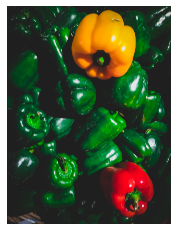

In [91]:
img = mpimg.imread('gridFS/new_paprica.jpg')
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

Zeigen Sie zur Überprüfung die Prüfsumme des Bildes ("md5") an.

In [92]:
query = {"_id":"p#175"}
for files in files_col.find(query):
    checksum = files.get("md5")
 
data = ({'md5' : [checksum]})
df = pd.DataFrame(data=data)
df
mongo_lm.show_task(801,df)

,md5
0,6b5a116597de1fe10e278c4e6c37ec59


Output()

Output()

Lesen Sie nun die Produkt ID aus den Metadaten aus und sehen Sie nach welches Produkt zu dem Bild gehört.

In [94]:
query = {"_id":"p#175"}
for files in files_col.find(query):
    product_id = files.get("meta").get("product_image_id")

query = {"_id":ObjectId(product_id)}    

df = pd.DataFrame(grocery_col.find(query))
df = df.astype(str)
mongo_lm.show_task(802,df)

,_id,product,price,in_stock,sold
0,5fe6fc8ba789e6e217ef8748,Spice - Paprika,€21.15,False,100


Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "HBox(children=(Button(description='Aus…

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': 'HTML(value=\'query = {"_id":"p#175"}\\…

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="Abschlussaufgabe">9. Abschlussaufgabe</b></h2></div>

In der Datenbank soll sich eine weitere Collection mit dem Namen: <b>"Transactions"</b> befinden. Führen Sie dazu den nachfolgenden Import aus. 

In [ ]:
!mongoimport --db Store --collection Transaction --file mongoData/transaction.json --jsonArray

Diese beinhaltet alle Informationen über die bereits getätigten Einkäufe und die Bankdaten der Kunden.
Im Gegensatz zu den anderen Collections wurden diese Dokumente mit einer selsterstellten ID versehen. 

Erstellen Sie eine Instanz der Collection "Transactions"

In [ ]:
trans_col = store_db["Transaction"]

Zeigen Sie das Dokument mit der <b>"_id" : "TJTj-238-ypT-2XA-389-Tv0"</b> aus der Collection an:

In [111]:
trans_col = store_db["Transaction"]
cursor = trans_col.find({"_id" : "TJTj-238-ypT-2XA-389-Tv0" })

df = df.astype(str)
df = pd.DataFrame(cursor)
mongo_lm.show_task(901,df)

,_id,customer,IBAN,credit_card,timestamp,costs,payed,purchased
0,TJTj-238-ypT-2XA-389-Tv0,5fe60bb5fc13ae64ea000373,MU90 CVRW 4031 7723 2292 9086 263O YZ,None,2020-12-15 06:11:35,29.18,False,"[5fe6fc8ba789e6e217ef8ac5, 5fe6fc8ba789e6e217ef89df]"


Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "Button(description='Auswertung', disab…

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "Image(value=b'\\x89PNG\\r\\n\\x1a\\n\\…

Lösen Sie den Array auf der sich innerhalb des gefundenen Dokumentes befindet.

In [120]:
trans_col = store_db["Transaction"]
pipeline = [
    {"$match": {"_id" : "TJTj-238-ypT-2XA-389-Tv0" }},
    {"$unwind": "$purchased"}
]

df = pd.DataFrame(trans_col.aggregate(pipeline))
df = df.astype(str)
mongo_lm.show_task(902,df)

,_id,customer,IBAN,credit_card,timestamp,costs,payed,purchased
0,TJTj-238-ypT-2XA-389-Tv0,5fe60bb5fc13ae64ea000373,MU90 CVRW 4031 7723 2292 9086 263O YZ,None,2020-12-15 06:11:35,29.18,False,5fe6fc8ba789e6e217ef8ac5
1,TJTj-238-ypT-2XA-389-Tv0,5fe60bb5fc13ae64ea000373,MU90 CVRW 4031 7723 2292 9086 263O YZ,None,2020-12-15 06:11:35,29.18,False,5fe6fc8ba789e6e217ef89df


Output()

Output()

Finden Sie die Produkte aud der Grocery Collection die in dieser Transaktion aufgelistet sind.

In [124]:
grocery_col = store_db["Grocery"]
products = grocery_col.find({"_id":{"$in":[ObjectId("5fe6fc8ba789e6e217ef8ac5"),ObjectId("5fe6fc8ba789e6e217ef89df")]}})

df = pd.DataFrame(products)
df = df.astype(str)
mongo_lm.show_task(903,df)

,_id,product,price,in_stock,sold,stock
0,5fe6fc8ba789e6e217ef89df,Wine - Blue Nun Qualitatswein,€14.21,True,59,3.0
1,5fe6fc8ba789e6e217ef8ac5,Mint - Fresh,€14.97,False,28,nan


Output()

Output()

Für zwei Kunden wurde noch keine Transaktion eingetragen, da noch keine Produkte im Warenkorb liegen. Sie müssen dies nun manuell durchführen. Die Kundin <b>"Maria Holm"</b> und der Kunde mit der <b>_id: ObjectId("600c7545096cd4ef6296c6ba")_</b> wollen unterschiedlliche Produkte im Shop kaufen.

"Maria Holm" möchte folgende Produkte in den Warenkorb legen:
- 1x "Chinese Foods - Chicken Wing"
- 1x "Pepper - Chili Powder" 

Der Kunde mit der _id: ObjectId("600c7545096cd4ef6296c6ba")_ folgende Produkte in den Warenkorb legen:
- 2x "Apples - Spartan"

Updaten Sie zuerst den Warenkorb der beiden Kunden:

In [163]:
# Marias Warenkorb updaten
customer_col = store_db["Customer"]
maria_doc = customer_col.find({"first_name":"Maria"})

for doc in maria_doc:
    maria_id = doc.get("_id")

customer_col.update_one(
    { "_id": maria_id  },
    { "$set": { "cart": [ObjectId("5fe6fc8ba789e6e217ef8715"),ObjectId("5fe6fc8ba789e6e217ef8716")] } },
)

In [135]:
df = pd.DataFrame(customer_col.find({"first_name":"Maria"}))
df = df.astype(str)
mongo_lm.show_task(904,df)

,_id,first_name,last_name,email,last_login,registration_date,address,cart
0,600c7584096cd4ef6296c6cf,Maria,Holm,hmari@doublt.com,2021-01-08 11:42:00,2013-07-22 05:42:00,"{'country': 'Canada', 'city': 'Toronto', 'street': '2 Livester Road', 'zip': 12549}","[ObjectId('5fe6fc8ba789e6e217ef8715'), ObjectId('5fe6fc8ba789e6e217ef8716')]"


Output()

Output()

In [162]:
# Den Warenkorb des Kunden mit der _id = ObjectId("600c7545096cd4ef6296c6ba") updaten
customer_col = store_db["Customer"]

customer_col.update_one(
    { "_id": ObjectId("600c7545096cd4ef6296c6ba")  },
    { "$set": { "cart": [ObjectId("5fe6fc8ba789e6e217ef872f"),ObjectId("5fe6fc8ba789e6e217ef872f")] } }
)

In [140]:
df = pd.DataFrame(customer_col.find({"_id":ObjectId("600c7545096cd4ef6296c6ba")}))
df = df.astype(str)
mongo_lm.show_task(905,df)

,_id,first_name,last_name,email,last_login,registration_date,address,cart
0,600c7545096cd4ef6296c6ba,Ben,Kingsley,bking@doublt.com,2021-01-01 07:42:00,2016-04-29 07:42:00,"{'country': 'USA', 'city': 'New York', 'street': '4 Crossing Road', 'zip': 77476}","[ObjectId('5fe6fc8ba789e6e217ef872f'), ObjectId('5fe6fc8ba789e6e217ef872f')]"


Output()

Output()

Erstellen Sie nun ein neues Dokument in der Collection "Transactions" um den Kauf von Marias Produkten abzuwickeln. Verwenden Sie dazu die <b>_id: TSE-184-4cB-FcF45-ACE</b> um das neue Dokument anzulegen.

In [149]:
trans_col = store_db["Transaction"]

new_doc = {
 'IBAN': 'MU90 CVRW 4031 7723 2292 9086 263O YZ',
 '_id': 'TSE-184-4cB-FcF45-ACE',
 'costs': 29.18,
 'credit_card': None,
 'customer': ObjectId('5fe60bb5fc13ae64ea000373'),
 'payed': False,
 'purchased': [ObjectId('5fe6fc8ba789e6e217ef8ac5'),
               ObjectId('5fe6fc8ba789e6e217ef89df')],
 'timestamp': datetime.datetime(2020, 12, 15, 6, 11, 35)}

trans_col.insert_one(new_doc)

DuplicateKeyError: E11000 duplicate key error collection: Store.Transaction index: _id_ dup key: { _id: "TSE-184-4cB-FcF45-ACE" }, full error: {'index': 0, 'code': 11000, 'keyPattern': {'_id': 1}, 'keyValue': {'_id': 'TSE-184-4cB-FcF45-ACE'}, 'errmsg': 'E11000 duplicate key error collection: Store.Transaction index: _id_ dup key: { _id: "TSE-184-4cB-FcF45-ACE" }'}

In [161]:
df = pd.DataFrame(trans_col.find({"_id":"TSE-184-4cB-FcF45-ACE"}))
df = df.astype(str)
mongo_lm.show_task(906,df)

,_id,IBAN,costs,credit_card,customer,payed,purchased,timestamp
0,TSE-184-4cB-FcF45-ACE,MU90 CVRW 4031 7723 2292 9086 263O YZ,29.18,None,5fe60bb5fc13ae64ea000373,False,"[ObjectId('5fe6fc8ba789e6e217ef8ac5'), ObjectId('5fe6fc8ba789e6e217ef89df')]",2020-12-15 06:11:35


Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "HBox(children=(Button(description='Aus…

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "Image(value=b'\\x89PNG\\r\\n\\x1a\\n\\…

In [156]:
mongo_lm.get_scored_points()

100.0

<div style="
  border: 2px solid white;
  border-radius: 15px;
  background-color: #168b33; 
  padding: 5px; 
  padding-left:25px;
  height: 50px;"><h2 ><b style="color: white" id="Schluss">10. Abschluss und Schlussfolgerungen aus dem Lernmodul</b></h2></div>

Unter diesen Quellen und Anmerkungen können die theoretischen Grundlagen gefunden werden unter dennen dieses Lernmodul erstellt wurde. 

<br>
<div style="border-bottom: 3px solid green;"><b id="">Offizielle MongoDB Quellen:</b></div>

<a href="https://docs.mongodb.com/drivers/pymongo/" >Python pymongo Dokumentation</a>

<a href="https://pymongo.readthedocs.io/en/stable/tutorial.html" >Python pymongo Tutorial</a>

Da in diesem Tutorial mit der Programmiersprache Python gearbeitet wurde, sind hier noch Quellen für weitere oft verwendetet Programmiersprachen:

<a href="https://docs.mongodb.com/drivers/" >Liste aller verfügbaren Treiber</a>

<br>
<div style="border-bottom: 3px solid green;"><b id="">Literaturquellen:</b></div>
    
<a href="https://books.google.de/books?hl=de&lr=&id=oc6PDwAAQBAJ&oi=fnd&pg=PP2&dq=Mastering+mongodb&ots=qLXT1OC6vo&sig=h-3EwDWiOnykbQgiKk5ngH2sf4U#v=onepage&q=Mastering%20mongodb&f=false">[1]</a> Giamas, Alex. Mastering MongoDB 4. x: Expert techniques to run high-volume and fault-tolerant database solutions using MongoDB 4. x. Packt Publishing Ltd, 2019.

<a href="https://books.google.de/books?hl=de&lr=&id=Yv1wDwAAQBAJ&oi=fnd&pg=PP1&dq=MongoDB+4+Doug+bierer&ots=kTS2al7CXh&sig=mC2nSJYMotryWPV2XI4d0UpQuOM#v=onepage&q=MongoDB%204%20Doug%20bierer&f=false">[2]</a> Bierer, Doug. MongoDB 4 Quick Start Guide: Learn the skills you need to work with the world's most popular NoSQL database. Packt Publishing Ltd, 2018.